In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import pickle
import random

In [ ]:
!pip install jupyter-dash

import plotly
import plotly.graph_objects as go
import plotly.express as px
from jupyter_dash import JupyterDash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output 


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.9 MB 31.4 MB/s 
     |████████████████████████████████| 1.6 MB 47.1 MB/s 
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11448 sha256=ee1d22b46886ac3b2c1581d65a529434afcaada0d7b529ab22d752e8a7838e59
  Stored in directory: /root/.cache/pip/wheels/f9/8d/8d/f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
Successfully built retrying


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [30]:
!cp /content/gdrive/MyDrive/git_projects/plastic_extruder/plastic_extruder/ /content/

cp: -r not specified; omitting directory '/content/gdrive/MyDrive/git_projects/plastic_extruder/plastic_extruder/'


In [6]:
df = pd.read_csv ('extrusion.csv')
df

,Datum,ST0_VARActAuftrag,ST110_VARExtr_0_HeizungZone_3_Regler_Y,ST110_VARExtr_0_HeizungZone_3_SollTemp,ST110_VARExtr_0_HeizungZone_4_Konfig,ST110_VARExtr_0_HeizungZone_4_Regler_X,ST110_VARExtr_0_HeizungZone_4_Regler_Y,ST110_VARExtr_0_HeizungZone_4_SollTemp,ST110_VARExtr_0_HeizungZone_5_Konfig,ST110_VARExtr_0_HeizungZone_5_Regler_X,...,ST114_VARTensPlusSp,ST114_VARTotalLen,ST114_VARTotalRolls,ST114_VARWdCloseCmd,ST114_VARWdSpeedHMI,ST114_VARWdSpSpeed,ST114_VARWdSpTens,ST114_VARWdTapeNum,ST114_VARWdTapeReductVal,ST114_VARWdTensVis
0,25.06.2018 4:40,0.0,9.0,190.0,1.0,193.0,0.0,190.0,1.0,190.0,...,21.0,3544103.0,2174.0,1.0,78.0,0.0,50.0,5.0,15.0,53.0
1,25.06.2018 4:42,0.0,9.0,190.0,1.0,193.0,0.0,190.0,1.0,190.0,...,21.0,3544103.0,2174.0,1.0,81.0,0.0,50.0,5.0,15.0,49.0
2,25.06.2018 4:45,0.0,9.0,190.0,1.0,193.0,0.0,190.0,1.0,190.0,...,21.0,3544103.0,2174.0,1.0,81.0,0.0,50.0,5.0,15.0,48.0
3,25.06.2018 4:47,0.0,10.0,190.0,1.0,193.0,0.0,190.0,1.0,190.0,...,21.0,3544103.0,2174.0,1.0,81.0,0.0,50.0,5.0,15.0,50.0
4,25.06.2018 4:49,0.0,11.0,190.0,1.0,193.0,0.0,190.0,1.0,190.0,...,21.0,3544103.0,2174.0,1.0,81.0,0.0,50.0,5.0,15.0,51.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226531,25.06.2019 6:36,0.0,2.0,165.0,1.0,170.0,0.0,165.0,1.0,165.0,...,22.0,799185.0,387.0,1.0,57.0,0.0,55.0,5.0,15.0,51.0
226532,25.06.2019 6:38,0.0,2.0,165.0,1.0,170.0,0.0,165.0,1.0,165.0,...,22.0,799185.0,387.0,1.0,56.0,0.0,55.0,5.0,15.0,51.0
226533,25.06.2019 6:40,0.0,2.0,165.0,1.0,170.0,0.0,165.0,1.0,165.0,...,22.0,799185.0,387.0,1.0,57.0,0.0,55.0,5.0,15.0,51.0
226534,25.06.2019 6:42,0.0,2.0,165.0,1.0,170.0,0.0,165.0,1.0,165.0,...,22.0,799185.0,387.0,1.0,56.0,0.0,55.0,5.0,15.0,51.0


In [7]:
df['date'] = pd.to_datetime(df['Datum'], format="%d.%m.%Y %H:%M")
df

,Datum,ST0_VARActAuftrag,ST110_VARExtr_0_HeizungZone_3_Regler_Y,ST110_VARExtr_0_HeizungZone_3_SollTemp,ST110_VARExtr_0_HeizungZone_4_Konfig,ST110_VARExtr_0_HeizungZone_4_Regler_X,ST110_VARExtr_0_HeizungZone_4_Regler_Y,ST110_VARExtr_0_HeizungZone_4_SollTemp,ST110_VARExtr_0_HeizungZone_5_Konfig,ST110_VARExtr_0_HeizungZone_5_Regler_X,...,ST114_VARTotalLen,ST114_VARTotalRolls,ST114_VARWdCloseCmd,ST114_VARWdSpeedHMI,ST114_VARWdSpSpeed,ST114_VARWdSpTens,ST114_VARWdTapeNum,ST114_VARWdTapeReductVal,ST114_VARWdTensVis,date
0,25.06.2018 4:40,0.0,9.0,190.0,1.0,193.0,0.0,190.0,1.0,190.0,...,3544103.0,2174.0,1.0,78.0,0.0,50.0,5.0,15.0,53.0,2018-06-25 04:40:00
1,25.06.2018 4:42,0.0,9.0,190.0,1.0,193.0,0.0,190.0,1.0,190.0,...,3544103.0,2174.0,1.0,81.0,0.0,50.0,5.0,15.0,49.0,2018-06-25 04:42:00
2,25.06.2018 4:45,0.0,9.0,190.0,1.0,193.0,0.0,190.0,1.0,190.0,...,3544103.0,2174.0,1.0,81.0,0.0,50.0,5.0,15.0,48.0,2018-06-25 04:45:00
3,25.06.2018 4:47,0.0,10.0,190.0,1.0,193.0,0.0,190.0,1.0,190.0,...,3544103.0,2174.0,1.0,81.0,0.0,50.0,5.0,15.0,50.0,2018-06-25 04:47:00
4,25.06.2018 4:49,0.0,11.0,190.0,1.0,193.0,0.0,190.0,1.0,190.0,...,3544103.0,2174.0,1.0,81.0,0.0,50.0,5.0,15.0,51.0,2018-06-25 04:49:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226531,25.06.2019 6:36,0.0,2.0,165.0,1.0,170.0,0.0,165.0,1.0,165.0,...,799185.0,387.0,1.0,57.0,0.0,55.0,5.0,15.0,51.0,2019-06-25 06:36:00
226532,25.06.2019 6:38,0.0,2.0,165.0,1.0,170.0,0.0,165.0,1.0,165.0,...,799185.0,387.0,1.0,56.0,0.0,55.0,5.0,15.0,51.0,2019-06-25 06:38:00
226533,25.06.2019 6:40,0.0,2.0,165.0,1.0,170.0,0.0,165.0,1.0,165.0,...,799185.0,387.0,1.0,57.0,0.0,55.0,5.0,15.0,51.0,2019-06-25 06:40:00
226534,25.06.2019 6:42,0.0,2.0,165.0,1.0,170.0,0.0,165.0,1.0,165.0,...,799185.0,387.0,1.0,56.0,0.0,55.0,5.0,15.0,51.0,2019-06-25 06:42:00


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226536 entries, 0 to 226535
Columns: 471 entries, Datum to date
dtypes: datetime64[ns](1), float64(469), object(1)
memory usage: 814.0+ MB


In [8]:
df.describe()

,ST0_VARActAuftrag,ST110_VARExtr_0_HeizungZone_3_Regler_Y,ST110_VARExtr_0_HeizungZone_3_SollTemp,ST110_VARExtr_0_HeizungZone_4_Konfig,ST110_VARExtr_0_HeizungZone_4_Regler_X,ST110_VARExtr_0_HeizungZone_4_Regler_Y,ST110_VARExtr_0_HeizungZone_4_SollTemp,ST110_VARExtr_0_HeizungZone_5_Konfig,ST110_VARExtr_0_HeizungZone_5_Regler_X,ST110_VARExtr_0_HeizungZone_5_Regler_Y,...,ST114_VARTensPlusSp,ST114_VARTotalLen,ST114_VARTotalRolls,ST114_VARWdCloseCmd,ST114_VARWdSpeedHMI,ST114_VARWdSpSpeed,ST114_VARWdSpTens,ST114_VARWdTapeNum,ST114_VARWdTapeReductVal,ST114_VARWdTensVis
count,226536.0,226474.000000,226474.000000,226474.0,226474.000000,226474.000000,226474.000000,226474.0,226474.000000,226474.000000,...,225435.000000,2.254350e+05,225435.000000,225435.000000,225435.000000,225435.0,225435.000000,225435.0,225435.0,225435.00000
mean,0.0,3.033558,176.069761,1.0,184.111399,0.565540,176.237815,1.0,176.359344,11.219849,...,21.104620,1.127531e+06,709.736514,0.793998,57.329057,0.0,69.033584,5.0,15.0,57.27753
std,0.0,7.461482,16.550270,0.0,21.348341,3.585595,16.569598,0.0,20.954396,9.545225,...,0.306064,1.409486e+06,920.508457,0.404433,32.022970,0.0,23.117881,0.0,0.0,31.43569
min,0.0,0.000000,100.000000,1.0,14.000000,0.000000,100.000000,1.0,10.000000,0.000000,...,21.000000,0.000000e+00,0.000000,0.000000,0.000000,0.0,40.000000,5.0,15.0,-4.00000
25%,0.0,0.000000,172.000000,1.0,180.000000,0.000000,172.000000,1.0,173.000000,3.000000,...,21.000000,1.691720e+05,102.000000,1.000000,31.000000,0.0,55.000000,5.0,15.0,49.00000
50%,0.0,0.000000,178.000000,1.0,186.000000,0.000000,178.000000,1.0,180.000000,11.000000,...,21.000000,5.182820e+05,291.000000,1.000000,73.000000,0.0,60.000000,5.0,15.0,58.00000
75%,0.0,3.000000,180.000000,1.0,191.000000,0.000000,182.000000,1.0,185.000000,17.000000,...,21.000000,1.404420e+06,889.000000,1.000000,83.000000,0.0,75.000000,5.0,15.0,67.00000
max,0.0,100.000000,250.000000,1.0,253.000000,100.000000,250.000000,1.0,254.000000,100.000000,...,22.000000,5.898309e+06,3860.000000,1.000000,100.000000,0.0,230.000000,5.0,15.0,302.00000


## Importance of thickness
In case of thin film extruder film thickness is very important. 
When film thickness is 0 it indicates that the production need to be stopped to correct it. From the data it indicate that extruder is multilayer extrudr system."ST110_VAREx_1_SDickeIst", "ST110_VAREx_2_SDickeIst", "ST110_VAREx_3_SDickeIst" are the thickness of films from extruder_1, extruder _2 and extruder_3. "ST110_VAREx_0_SDickeIst" is the final thickness of the extruded films and most important parameter.

In [8]:
df2 = df[["ST110_VAREx_0_SDickeIst", "ST110_VAREx_1_SDickeIst", "ST110_VAREx_2_SDickeIst", "ST110_VAREx_3_SDickeIst"]]
df2

,ST110_VAREx_0_SDickeIst,ST110_VAREx_1_SDickeIst,ST110_VAREx_2_SDickeIst,ST110_VAREx_3_SDickeIst
0,28.9,5.7,17.3,6.0
1,29.0,5.8,17.4,5.8
2,29.0,5.8,17.4,5.8
3,28.9,5.8,17.4,5.8
4,29.1,5.8,17.5,5.8
...,...,...,...,...
226531,38.8,9.7,19.2,9.8
226532,39.1,9.7,19.6,9.8
226533,39.2,9.7,19.6,9.8
226534,38.8,9.7,19.3,9.7


In [ ]:
df2.describe()

,ST110_VAREx_0_SDickeIst,ST110_VAREx_1_SDickeIst,ST110_VAREx_2_SDickeIst,ST110_VAREx_3_SDickeIst
count,226474.000000,226474.000000,226474.000000,226474.000000
mean,39.219676,9.548634,20.282930,9.390255
std,26.873275,6.948936,13.945361,6.710497
min,0.000000,0.000000,0.000000,0.000000
25%,29.500000,6.200000,14.700000,6.200000
50%,34.200000,7.400000,18.600000,7.400000
75%,44.000000,11.700000,22.200000,11.600000
max,986.500000,287.500000,521.200000,265.200000


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226536 entries, 0 to 226535
Data columns (total 4 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   ST110_VAREx_0_SDickeIst  226474 non-null  float64
 1   ST110_VAREx_1_SDickeIst  226474 non-null  float64
 2   ST110_VAREx_2_SDickeIst  226474 non-null  float64
 3   ST110_VAREx_3_SDickeIst  226474 non-null  float64
dtypes: float64(4)
memory usage: 6.9 MB


In [ ]:
df2.describe()

,ST110_VAREx_0_SDickeIst,ST110_VAREx_1_SDickeIst,ST110_VAREx_2_SDickeIst,ST110_VAREx_3_SDickeIst
count,226474.000000,226474.000000,226474.000000,226474.000000
mean,39.219676,9.548634,20.282930,9.390255
std,26.873275,6.948936,13.945361,6.710497
min,0.000000,0.000000,0.000000,0.000000
25%,29.500000,6.200000,14.700000,6.200000
50%,34.200000,7.400000,18.600000,7.400000
75%,44.000000,11.700000,22.200000,11.600000
max,986.500000,287.500000,521.200000,265.200000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fad5a8a1510>,
      dtype=object)

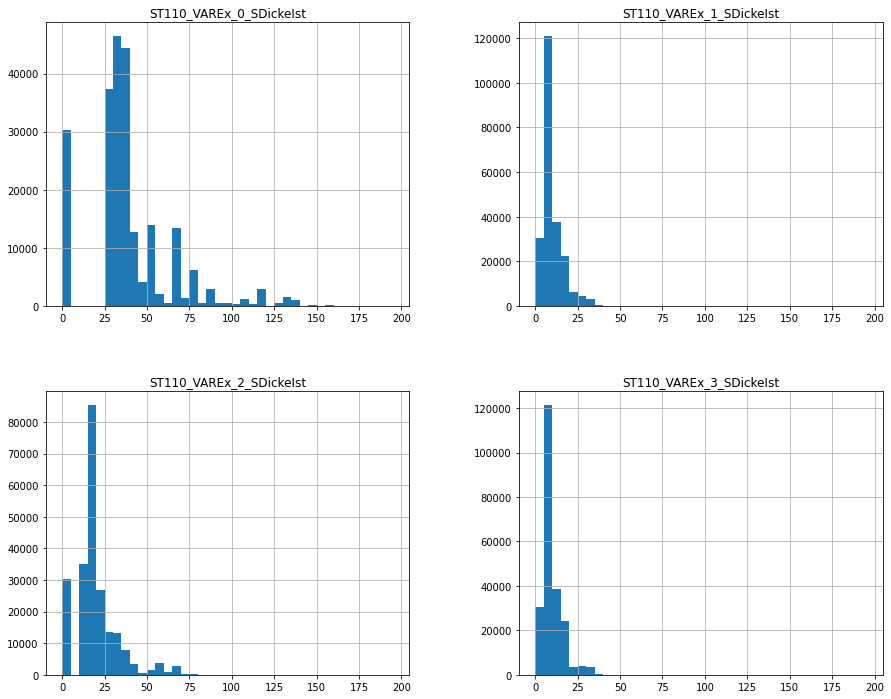

In [10]:
# plot histogram of thickness 

plt.rcParams['figure.figsize'] = [15, 12]
df.hist(column=["ST110_VAREx_0_SDickeIst", "ST110_VAREx_1_SDickeIst", "ST110_VAREx_2_SDickeIst", "ST110_VAREx_3_SDickeIst"], bins=range(0, 200,5))

All the three extruder and main extruder have around 30000 instances of zero thickness. This indicates that if a problem happends in one extruder all extruders are stopped while correcting it.Some of these instances also could be due to the stoppage for die change and material change.

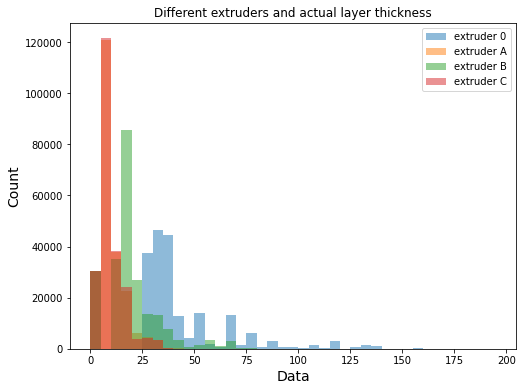

In [ ]:
plt.figure(figsize=(8,6))
plt.hist(df['ST110_VAREx_0_SDickeIst'], bins=range(0, 200,5), alpha=0.5, label="extruder 0")

plt.hist(df['ST110_VAREx_1_SDickeIst'], bins=range(0, 200,5), alpha=0.5, label="extruder A")

plt.hist(df['ST110_VAREx_2_SDickeIst'], bins=range(0, 200,5), alpha=0.5, label="extruder B")

plt.hist(df['ST110_VAREx_3_SDickeIst'], bins=range(0, 200,5), alpha=0.5, label="extruder C")
plt.xlabel("Data", size=14)
plt.ylabel("Count", size=14)
plt.title("Different extruders and actual layer thickness")
plt.legend(loc='upper right')

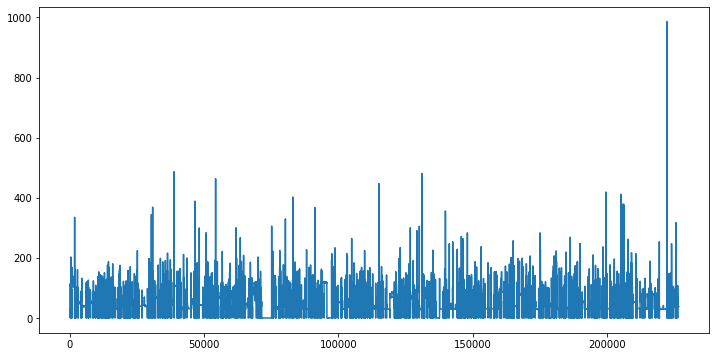

In [ ]:
plt.plot(df['ST110_VAREx_0_SDickeIst'])

# Finding failure sequences

In [9]:
df['classified'] = np.where(df['ST110_VAREx_0_SDickeIst']== 0, 0, 1)
df['classified']

0         1
1         1
2         1
3         1
4         1
         ..
226531    1
226532    1
226533    1
226534    1
226535    1
Name: classified, Length: 226536, dtype: int64

In [10]:
df['classified'].value_counts()            

1    196208
0     30328
Name: classified, dtype: int64

In [13]:
count_0 = (df['ST110_VAREx_0_SDickeIst'] == 0).sum()
count_a = (df['ST110_VAREx_0_SDickeIst'] == 0).sum()
count_b = (df['ST110_VAREx_0_SDickeIst'] == 0).sum()
count_c = (df['ST110_VAREx_0_SDickeIst'] == 0).sum()
print('No of zeros in thickness of 0, A, B, C', count_0, count_a, count_b, count_c)

No of zeros in thickness of 0, A, B, C 30328 30328 30328 30328


The counts indicate that all the extruder become zero at same time. Not one after another.

## No of failure sequnces

In [11]:
classified_list = df['classified'].to_list()

In [15]:
len(classified_list)

226536

In [12]:
#remove repeating adjacent zero when machine is not working by adding a new column
classified_list2 = []
count = 0
for value in classified_list:
    if count == 0:
        classified_list2.append(1)
    else:
        if classified_list[count] == 0:
            count2 = count-1
            if classified_list[count2] == 0:
                classified_list2.append(0)
            else:
                classified_list2.append(1)
        else:
            classified_list2.append(1)
    count = count+1

In [17]:
count

226536

In [18]:
len(classified_list2)

226536

In [19]:
df[610:620]['ST110_VAREx_3_SDickeIst']

610    6.2
611    6.2
612    6.2
613    6.2
614    6.2
615    6.2
616    6.2
617    6.2
618    6.2
619    6.2
Name: ST110_VAREx_3_SDickeIst, dtype: float64

In [13]:
df['classified2'] = classified_list2

In [14]:
df2 = df[df['classified2'] == 1] #Include only first zero values in case of continuous zero thickness

In [15]:
df2

,Datum,ST0_VARActAuftrag,ST110_VARExtr_0_HeizungZone_3_Regler_Y,ST110_VARExtr_0_HeizungZone_3_SollTemp,ST110_VARExtr_0_HeizungZone_4_Konfig,ST110_VARExtr_0_HeizungZone_4_Regler_X,ST110_VARExtr_0_HeizungZone_4_Regler_Y,ST110_VARExtr_0_HeizungZone_4_SollTemp,ST110_VARExtr_0_HeizungZone_5_Konfig,ST110_VARExtr_0_HeizungZone_5_Regler_X,...,ST114_VARWdCloseCmd,ST114_VARWdSpeedHMI,ST114_VARWdSpSpeed,ST114_VARWdSpTens,ST114_VARWdTapeNum,ST114_VARWdTapeReductVal,ST114_VARWdTensVis,date,classified,classified2
0,25.06.2018 4:40,0.0,9.0,190.0,1.0,193.0,0.0,190.0,1.0,190.0,...,1.0,78.0,0.0,50.0,5.0,15.0,53.0,2018-06-25 04:40:00,1,1
1,25.06.2018 4:42,0.0,9.0,190.0,1.0,193.0,0.0,190.0,1.0,190.0,...,1.0,81.0,0.0,50.0,5.0,15.0,49.0,2018-06-25 04:42:00,1,1
2,25.06.2018 4:45,0.0,9.0,190.0,1.0,193.0,0.0,190.0,1.0,190.0,...,1.0,81.0,0.0,50.0,5.0,15.0,48.0,2018-06-25 04:45:00,1,1
3,25.06.2018 4:47,0.0,10.0,190.0,1.0,193.0,0.0,190.0,1.0,190.0,...,1.0,81.0,0.0,50.0,5.0,15.0,50.0,2018-06-25 04:47:00,1,1
4,25.06.2018 4:49,0.0,11.0,190.0,1.0,193.0,0.0,190.0,1.0,190.0,...,1.0,81.0,0.0,50.0,5.0,15.0,51.0,2018-06-25 04:49:00,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226531,25.06.2019 6:36,0.0,2.0,165.0,1.0,170.0,0.0,165.0,1.0,165.0,...,1.0,57.0,0.0,55.0,5.0,15.0,51.0,2019-06-25 06:36:00,1,1
226532,25.06.2019 6:38,0.0,2.0,165.0,1.0,170.0,0.0,165.0,1.0,165.0,...,1.0,56.0,0.0,55.0,5.0,15.0,51.0,2019-06-25 06:38:00,1,1
226533,25.06.2019 6:40,0.0,2.0,165.0,1.0,170.0,0.0,165.0,1.0,165.0,...,1.0,57.0,0.0,55.0,5.0,15.0,51.0,2019-06-25 06:40:00,1,1
226534,25.06.2019 6:42,0.0,2.0,165.0,1.0,170.0,0.0,165.0,1.0,165.0,...,1.0,56.0,0.0,55.0,5.0,15.0,51.0,2019-06-25 06:42:00,1,1


In [23]:
df2['classified'].value_counts()  

1    196208
0       903
Name: classified, dtype: int64

This indicates that there are 903 instance of failure or stopping

## Position where failure happends

In [16]:
# to know row number where classified is 0
row_list1= df2[df2['classified'] == 0].index.to_numpy()
row_list1

array([   183,    390,    661,    734,    740,    756,    762,    770,
          780,   1814,   1823,   1830,   1959,   2061,   2209,   2855,
         3128,   4180,   4276,   4322,   4430,   5965,   5992,   6273,
         6899,   6950,   7556,   8459,   8754,   9466,   9580,   9681,
        10245,  10406,  10517,  10796,  10903,  10937,  11385,  11810,
        11841,  11987,  12069,  12163,  12543,  12903,  13206,  13229,
        13259,  13756,  13768,  13798,  13816,  14003,  14031,  14062,
        14176,  14205,  14220,  14376,  14389,  14650,  14707,  15328,
        15800,  15847,  15862,  15875,  15965,  16747,  16755,  17814,
        17823,  18311,  18367,  18395,  18401,  18429,  18451,  18455,
        18461,  18481,  18504,  18511,  18633,  18692,  19063,  19877,
        19975,  20305,  20548,  20631,  20638,  20649,  20886,  20952,
        20974,  20980,  21291,  21311,  21435,  21629,  21704,  21784,
        21813,  21828,  21970,  22112,  22129,  22279,  22457,  22520,
      

In [25]:
# save the problem rows as a new spreadsheet for analysis
df3 = df2.loc[178:188]
df4 = df2.loc[385:395]

In [26]:
df4['ST110_VAREx_0_SDickeIst']

385    29.1
386    29.0
387    29.1
388    29.0
389    29.0
390     0.0
Name: ST110_VAREx_0_SDickeIst, dtype: float64

In [17]:
 df2_re = df2.reset_index(drop=True) #reindexing as only first row with zero thickness included

In [18]:
df4_re = df2_re.loc[178:188]
df4_re['ST110_VAREx_0_SDickeIst']

178     29.1
179     29.0
180     29.0
181     29.0
182     29.0
183      0.0
184    113.6
185     91.9
186    100.0
187     96.5
188    114.4
Name: ST110_VAREx_0_SDickeIst, dtype: float64

In [19]:
# to know row number where classified is 0 after reindexing
row_list1_re= df2_re[df2_re['classified'] == 0].index.to_numpy()
row_list1_re

array([   183,    382,    614,    623,    625,    630,    635,    637,
          647,   1681,   1685,   1688,   1817,   1833,   1887,   2516,
         2770,   3781,   3872,   3914,   4017,   5524,   5527,   5808,
         6374,   6420,   6994,   7870,   8149,   8826,   8903,   8931,
         9487,   9590,   9690,   9961,  10025,  10044,  10427,  10850,
        10875,  11014,  11063,  11088,  11438,  11789,  12083,  12095,
        12120,  12608,  12610,  12640,  12649,  12831,  12839,  12866,
        12978,  13001,  13011,  13157,  13166,  13425,  13458,  14076,
        14538,  14582,  14591,  14601,  14685,  15458,  15462,  16514,
        16518,  17006,  17008,  17033,  17037,  17048,  17068,  17070,
        17073,  17092,  17095,  17101,  17116,  17136,  17480,  18283,
        18290,  18618,  18831,  18833,  18840,  18849,  19074,  19090,
        19107,  19109,  19417,  19430,  19550,  19689,  19717,  19789,
        19810,  19812,  19953,  20092,  20101,  20249,  20415,  20472,
      

### Failure at 382 closer look

In [21]:
df3_re = df2_re.loc[375:395]
df3_re['ST110_VAREx_0_SDickeIst']

375     29.0
376     29.0
377     29.1
378     29.0
379     29.1
380     29.0
381     29.0
382      0.0
383    107.9
384    202.8
385    164.6
386    108.3
387    132.0
388     84.5
389     87.0
390     37.1
391     37.0
392     36.6
393     36.3
394     36.5
395     36.5
Name: ST110_VAREx_0_SDickeIst, dtype: float64

In [22]:
pd.options.plotting.backend = "plotly"
df3_re_ext = df2_re.loc[150:1300]
df3_re_ext.plot(x=df3_re_ext.index, y = ['ST110_VAREx_0_SDickeIst','ST110_VAREx_1_SDickeIst',
                                 'ST110_VAREx_2_SDickeIst','ST110_VAREx_3_SDickeIst' ])

In [74]:
#plotting with time
pd.options.plotting.backend = "plotly"
df3_re_ext = df2_re.loc[150:1300]
df3_re_ext.plot(x=df3_re_ext.date, y = ['ST110_VAREx_0_SDickeIst','ST110_VAREx_1_SDickeIst',
                                 'ST110_VAREx_2_SDickeIst','ST110_VAREx_3_SDickeIst' ])

In [76]:
#plotting original
df4_re_ext = df.loc[150:1500]
df4_re_ext.plot(x=df4_re_ext.date, y = ['ST110_VAREx_0_SDickeIst','ST110_VAREx_1_SDickeIst',
                                 'ST110_VAREx_2_SDickeIst','ST110_VAREx_3_SDickeIst' ])

In [73]:
#plotting original
df4_re_ext = df.loc[150:1500]
df4_re_ext.plot(x=df4_re_ext.index, y = ['ST110_VAREx_0_SDickeIst','ST110_VAREx_1_SDickeIst',
                                 'ST110_VAREx_2_SDickeIst','ST110_VAREx_3_SDickeIst' ])

Problem June 25 18:43, June 26 4:30 could be due to dimension change. While problem at June 27 7:29 clearly an anomaly. Problem June 26 1:00 AM is not clearly an anomaly.

In [36]:
#plotting original
df4_re_ext = df.loc[10000:11500]
df4_re_ext.plot(x=df4_re_ext.date, y = ['ST110_VAREx_0_SDickeIst','ST110_VAREx_1_SDickeIst',
                                 'ST110_VAREx_2_SDickeIst','ST110_VAREx_3_SDickeIst' ])

short stops at july 10 20:23 and 00:23 could be due to problems as the machine continued with same thickness afterwards. Similarly problem at july 12 7:44 also due to problems as the machine continue afterwards with same dimensions.

It seems stopping at 382 was for dimension change

In [ ]:
df3_re = df2_re.loc[0:1000]

In [23]:
len(row_list1_re)

903

In [24]:
# Removing multiple values from a single event
c1 = 1
row_list1_re_f1 = []

while c1 < len(row_list1_re):
  c2 = c1 - 1 
  if c1 == 1:
    row_list1_re_f1.append(row_list1_re[0])      # adding the first value

  n1 = row_list1_re[c1]
  n2 = row_list1_re[c2]
  d = abs(n2-n1)
  if d > 20:
    row_list1_re_f1.append(row_list1_re[c1])
  c1 = c1+1

In [25]:
len(row_list1_re_f1)

608

In [26]:
row_list1_re2 = row_list1_re_f1[:20]

In [27]:
row_list1_re2_f2 = []
for tpoint in row_list1_re_f1:
  n1 = tpoint - 100
  n2 = tpoint - 50
  n3 = tpoint + 100
  n4 = tpoint + 150
  values_before = df2_re.ST110_VAREx_0_SDickeIst[n1:n2]
  values_after = df2_re.ST110_VAREx_0_SDickeIst[n3:n4]
  avg1 = values_before.mean()
  avg2 = values_after.mean()
  d_avg = abs(avg1-avg2)
  if d_avg < 2:
    row_list1_re2_f2.append(tpoint)

  

In [28]:
row_list1_re2_f2[:20]

[183,
 5524,
 5808,
 6374,
 6420,
 7870,
 9487,
 10427,
 10850,
 11438,
 11789,
 12608,
 12640,
 14076,
 14538,
 15458,
 16514,
 18618,
 20092,
 20249]

In [29]:
len(row_list1_re2_f2)

222

In [77]:
filename = 'row_list1_re2_f2.sav'
pickle.dump(row_list1_re2_f2, open(filename, 'wb'))

In [78]:
!cp /content/row_list1_re2_f2.sav /content/gdrive/MyDrive/git_projects/plastic_extruder/plastic_extruder/ 

Originally there were 903 cases of stoppage. Filter one removed very closer stoppages as probably due to the same reason or while solving the problems. After removing closer stoppages there were only 608 cases. However, we found that many of the stoppages due to dimension changes. After removing the stoppages due to dimension changes there were only 222 stoppages.

# Prepare 222 points of stoppages for further classification studies

In [60]:
# generate sequuences without stoppage for machine learning comparison
#make same number random numbers 
row_list2=[]
for i in range(2000):
          r=random.randint(1,197110)
          if r not in row_list2: row_list2.append(r)

In [61]:
len(row_list2)              

1981

In [36]:
row_list2_a = row_list2[:20]

In [40]:
row_list2_a

[158738,
 74661,
 160978,
 185601,
 40807,
 29606,
 152869,
 107169,
 103703,
 184086,
 66316,
 109844,
 43505,
 44081,
 140175,
 69883,
 13241,
 45975,
 53795,
 185367]

In [68]:
#check any zero values
zero_val = []
for numb in row_list2:
  i=0
  while i<20:
    numb2 = numb-i
    if df2_re.ST110_VAREx_0_SDickeIst[numb2] == 0:
      if numb not in zero_val: zero_val.append(numb)
      #zero_val.append(numb)
      #row_list2.remove(numb)

    i = i+1     

In [71]:
#zero_val

In [70]:
len(zero_val)

134

In [75]:
row_list2_f1 = list(set(row_list2) - set(zero_val))

In [76]:
len(row_list2_f1)

1846

## Combining lists

In [ ]:
row_list3 = row_list1.tolist()

In [83]:
row_list_comb= []
row_list_comb = row_list2_f1 + row_list1_re2_f2
row_list_comb[2050:]

[176819,
 179972,
 180564,
 181607,
 181655,
 182826,
 183315,
 185545,
 185864,
 187598,
 187643,
 187893,
 187933,
 188429,
 189846,
 193975,
 194716,
 196451]

In [84]:
len(row_list_comb)

2068

In [46]:
df2_re.ST110_VAREx_0_SDickeIst[109834:109844]

109834     0.0
109835    85.7
109836     0.0
109837    78.8
109838     0.0
109839    90.3
109840    91.7
109841    91.9
109842    83.8
109843    66.4
Name: ST110_VAREx_0_SDickeIst, dtype: float64

In [41]:
#plotting with time
pd.options.plotting.backend = "plotly"
df3_re_ext = df2_re.loc[185501:185601]
df3_re_ext.plot(x=df3_re_ext.index, y = ['ST110_VAREx_0_SDickeIst','ST110_VAREx_1_SDickeIst',
                                 'ST110_VAREx_2_SDickeIst','ST110_VAREx_3_SDickeIst' ])

In [ ]:
#make sequence 

y_target = []

i=0

for row_n in row_list_comb:
    row_number = row_n-10
    dfa1 = df5.loc[[row_number]]
    dfa2 = df5.loc[[row_number+1]]
    dfa3 = df5.loc[[row_number+2]]
    dfa4 = df5.loc[[row_number+3]]
    dfa5 = df5.loc[[row_number+4]]
    dfa6= df5.loc[[row_number+5]]
    dfa7 = df5.loc[[row_number+6]]
    dfa8= df5.loc[[row_number+7]]
    dfa9= df5.loc[[row_number+8]]
    dfa10= df5.loc[[row_number+9]]
    dfa1 = dfa1.reset_index(drop=True)
    dfa2 = dfa2.reset_index(drop=True)
    dfa3 = dfa3.reset_index(drop=True)
    dfa4 = dfa4.reset_index(drop=True)
    dfa5 = dfa5.reset_index(drop=True)
    dfa6 = dfa6.reset_index(drop=True)
    dfa7 = dfa7.reset_index(drop=True)
    dfa8 = dfa8.reset_index(drop=True)
    dfa9 = dfa9.reset_index(drop=True)
    dfa10 = dfa10.reset_index(drop=True)
    
    dfa11 = pd.concat([dfa1,dfa2,dfa3,dfa4,dfa5,dfa6,dfa7,dfa8,dfa9,dfa10], axis=1)
    dfa11 = dfa11.reset_index(drop=True)
    dfa12 = dfa11.loc[[0]]
    if i == 0:
        df7 = dfa12
    else:
        df7 = pd.concat([df7, dfa12], axis=0)
    y_value = df5a.loc[row_number+10]['classified']
    y_target.append(y_value)
    i = i+1


In [ ]:
count = df5.shape[1]
count2 = 0
y_target = []
#row_list_comb2 = [183,382,1000,2000]

for row_n in row_list_comb:
    row_up_number = row_n-10
    
    #for name in col_names:
        #y_c = df5.loc[row_up_number:row_low_number][name]
        #y_c_l = y_c.to_list
        #y_tot.append(y_c_l)
    y_c_r_t = []
    i = 0
    while i< count:
        c = 0
        y_c_r = []
        row_up_number = row_n-10
        while c < 10:
            y_c =df5.loc[row_up_number][i]
            row_up_number = row_up_number+1
            y_c_r.append(y_c)
            c = c+1

        y_c_r_t.append(y_c_r)

        i=i+1
        
    y_c_r_t_flat = list(chain.from_iterable(y_c_r_t))
    dfb = pd.DataFrame(y_c_r_t_flat)
    dfb = pd.DataFrame(np.array(dfb).reshape(-1,len(dfb)))
    
    if count2 ==0:
        dfc = dfb
    else:
        dfc = pd.concat([dfc, dfb], axis=0)
    count2 = count2+1
    
    y_value = df5a.loc[row_n]['classified']
    y_target.append(y_value)